In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import os

# Import ML tools
module_path = '/home/russbate/MLPionCollaboration/LCStudies/'
import sys
sys.path.append(module_path)
from util import resolution_util as ru
from util import plot_util as pu
from util import deep_set_util as dsu

# PointNet Results from Narval

## Load Training History

In [2]:
with open('results/history2690520.pickle', 'rb') as pfn_base_histFile:
    PointNet_hist = pickle.load(pfn_base_histFile)

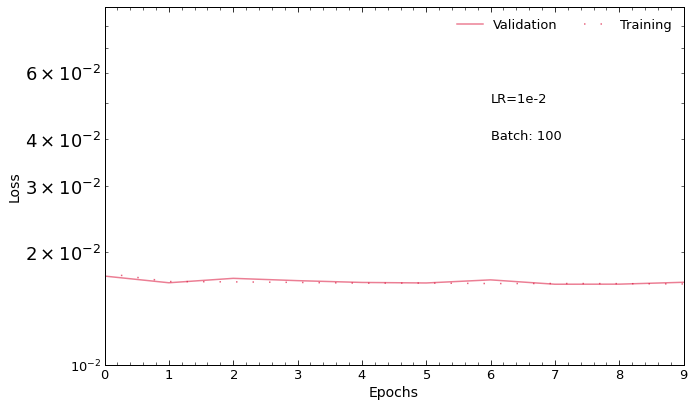

In [29]:
fig = plt.figure(figsize=(10,6))
plt.plot(PointNet_hist['val_loss'], label="Validation", color='crimson',
         ls='solid', alpha=.55)
plt.plot(PointNet_hist['loss'], label="Training", color='crimson',
         ls=(0, (1, 10)), alpha=.65)

plt.yscale('log')
plt.ylim(.01,.09)
plt.yticks(fontsize=13)
plt.xlim(0,9)
plt.xticks(fontsize=13)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', ncol=3)
plt.text(6, 5e-2, 'LR=1e-2', fontsize=13)
plt.text(6, 4e-2, 'Batch: 100', fontsize=13)
plt.tight_layout()
# plt.savefig('Plots/February22/PointNet_delta_Segmentation_'+\
#             'lossCurves_100batch_LR1e-2_2022-02-15.png', format='png')
plt.show()

## Targets vs Predictions

In [16]:
tpreds_PointNet_delta = np.load('results/target_preds2690520.npz')

In [22]:
print(tpreds_PointNet_delta['kwds'])
PointNet_delta_target = np.squeeze(tpreds_PointNet_delta['args'][0], axis=2)
PointNet_delta_preds = np.squeeze(tpreds_PointNet_delta['args'][1], axis=2)
print(PointNet_delta_target.shape)
print(PointNet_delta_preds.shape)

['target' 'prediction']
(53383, 1053)
(53383, 1053)


In [23]:
nz_mask = PointNet_delta_target != 0

<Figure size 799.992x599.976 with 0 Axes>

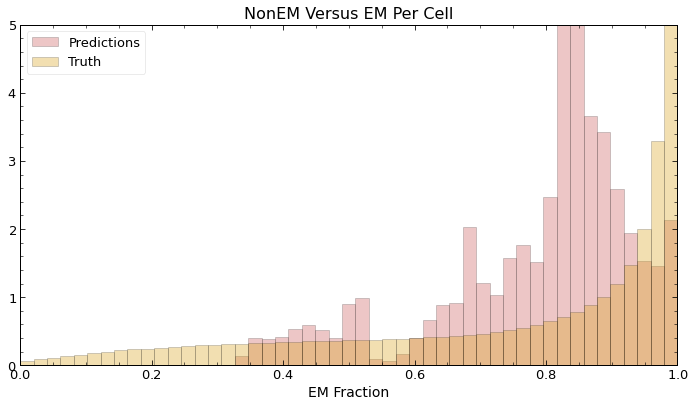

In [28]:
plt.cla(); plt.clf()
fig = plt.figure(figsize=(10,6))

EMbins = np.linspace(0,1,50, endpoint=True)
plt.hist(PointNet_delta_preds[nz_mask], color='indianred', bins=EMbins, density=True,
        alpha=.35, edgecolor='black', label='Predictions')
plt.hist(PointNet_delta_target[nz_mask], color='goldenrod', bins=EMbins, density=True,
        alpha=.35, edgecolor='black', label='Truth')
plt.title('NonEM Versus EM Per Cell', fontsize=16)
plt.xlabel('EM Fraction', fontsize=14)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left', frameon=True, fancybox=True, prop={'size': 13})
plt.tight_layout()
# plt.savefig('Plots/February22/predsHist_pnetDelta_LR1e-2_batch100_Epochs10_'+\
#             'Train2.5e5_2022-02-15.png', format='png')
plt.show()